In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [244]:
df = pd.read_csv("bank_marketing_part1_Data.csv")

In [245]:
df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [247]:
df.shape

(210, 7)

In [248]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

Summary Statistics

In [249]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [250]:
df.duplicated().sum()

0

# EDA for 7 variables. 

Univariate analysis for each variable: Histogram, boxplots
Bi-variate analysis
multi variate analysis or pair plot
correlation between variables 

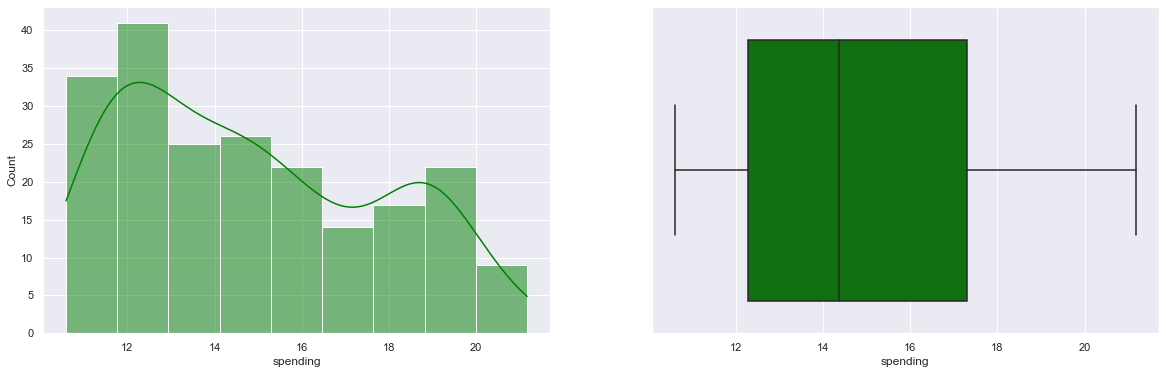

In [251]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(df.spending , kde=True, ax=axs[0], color='green')
sns.boxplot(x='spending',data=df, ax=axs[1], color='green');

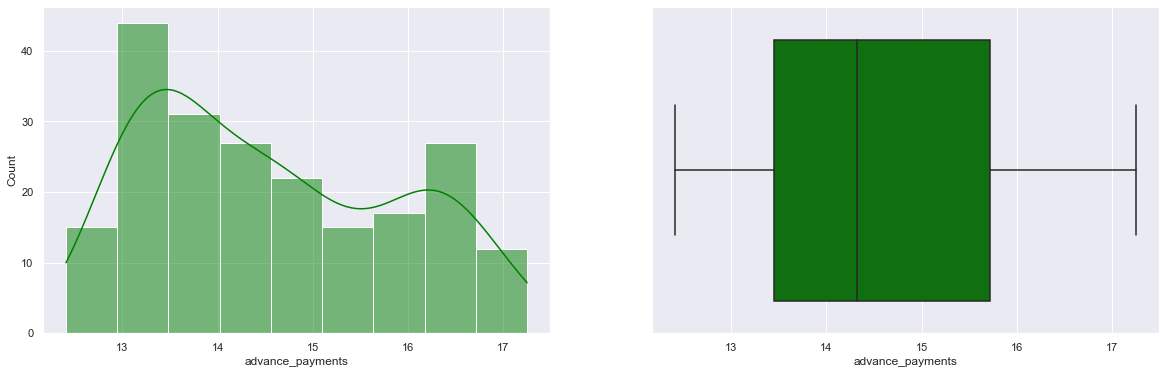

In [252]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(df.advance_payments, kde=True, ax=axs[0], color='green')
sns.boxplot(x='advance_payments',data=df, ax=axs[1], color='green');

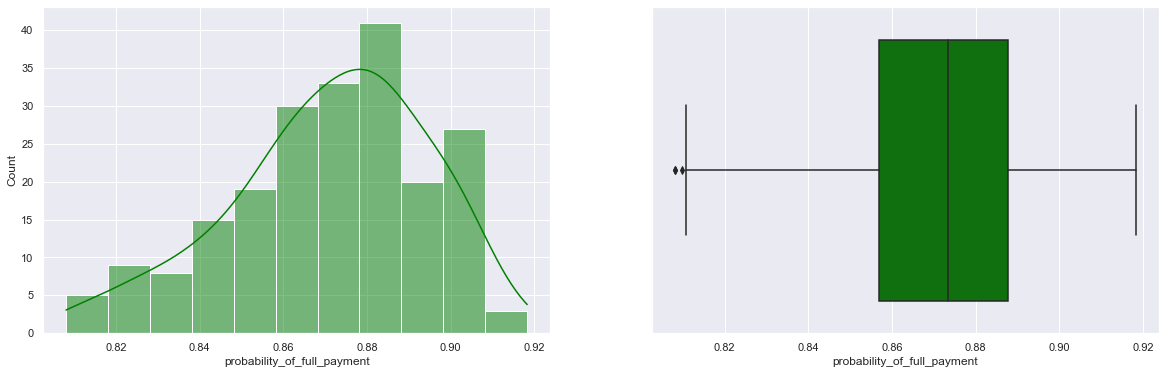

In [253]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(df.probability_of_full_payment, kde=True, ax=axs[0], color='green')
sns.boxplot(x='probability_of_full_payment',data=df, ax=axs[1], color='green');

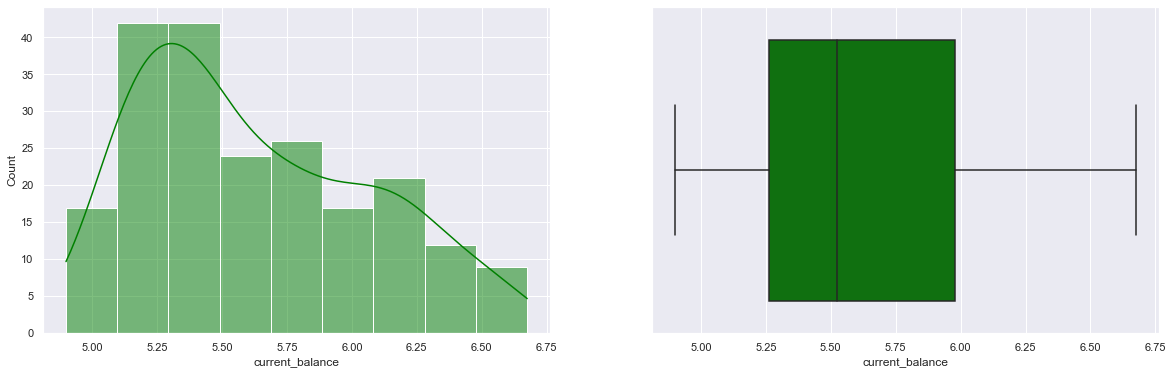

In [254]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(df.current_balance, kde=True, ax=axs[0], color='green')
sns.boxplot(x='current_balance', data=df, ax=axs[1], color='green');

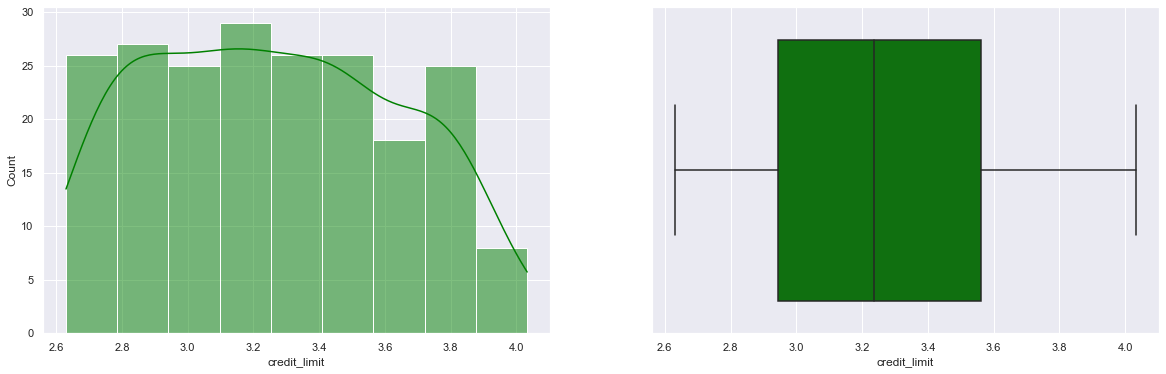

In [255]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(df.credit_limit, kde=True, ax=axs[0], color='green')
sns.boxplot(x='credit_limit', data=df, ax=axs[1], color='green');

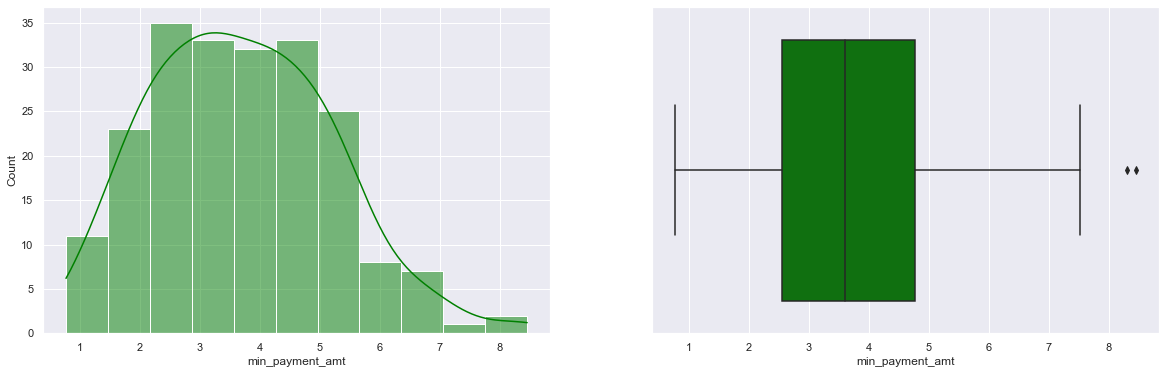

In [256]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(df.min_payment_amt, kde=True, ax=axs[0], color ='green')
sns.boxplot(x='min_payment_amt', data=df, ax=axs[1], color='green');

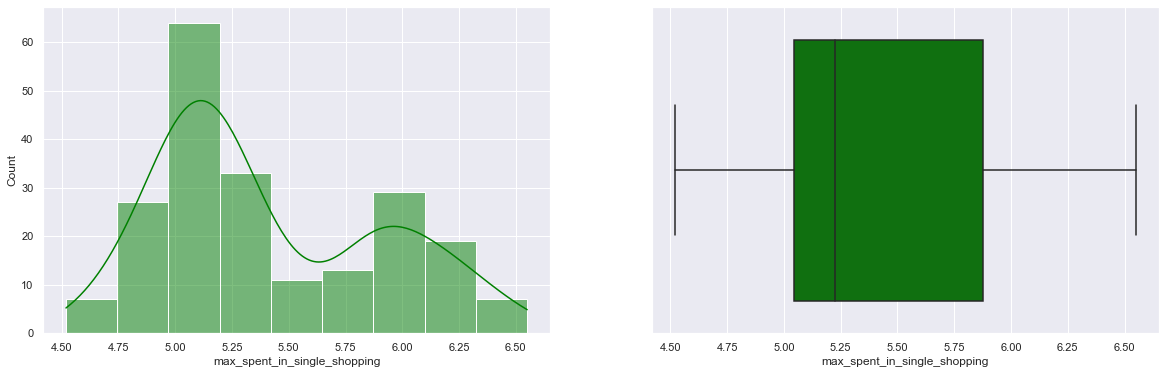

In [257]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(df.max_spent_in_single_shopping, kde=True, ax=axs[0], color='green')
sns.boxplot(x='max_spent_in_single_shopping', data=df, ax=axs[1], color='green');

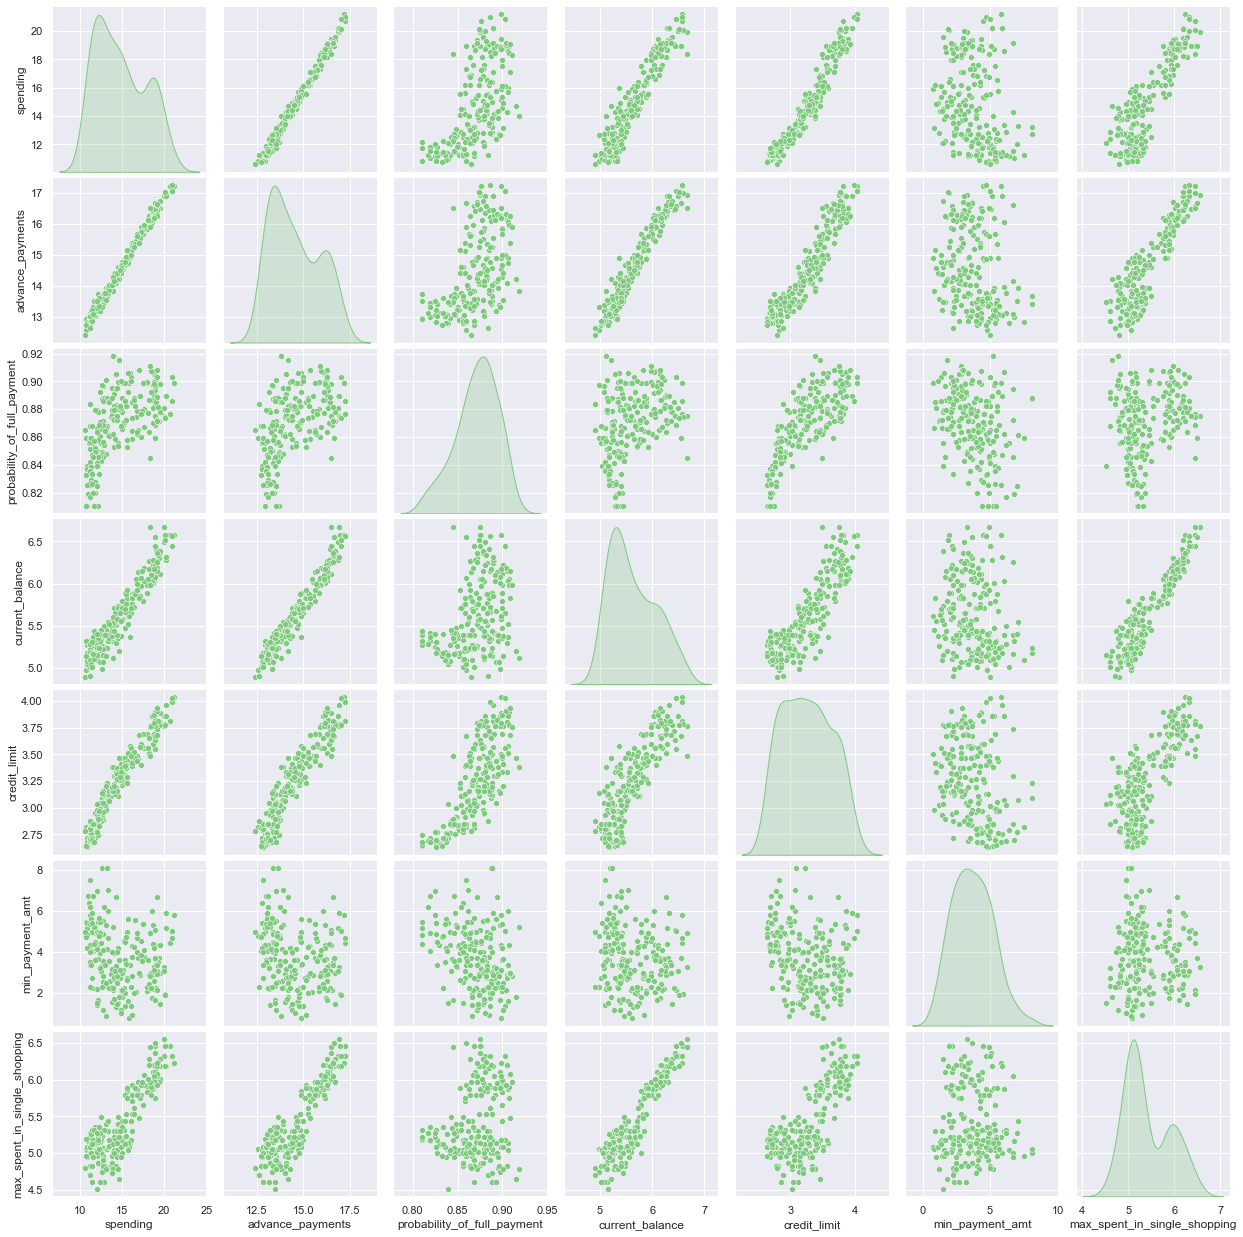

In [293]:
sns.set(style="darkgrid", color_codes=True, palette= 'Accent')
sns.pairplot(df, diag_kind='kde')
plt.show()

In [294]:
df.corr().T

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608900,0.949985,0.970771,-0.229619,0.863693
advance_payments,0.994341,1.000000,0.529925,0.972422,0.944829,-0.217051,0.890784
probability_of_full_payment,0.608900,0.529925,1.000000,0.368419,0.762218,-0.335071,0.227140
current_balance,0.949985,0.972422,0.368419,1.000000,0.860415,-0.170701,0.932806
credit_limit,0.970771,0.944829,0.762218,0.860415,1.000000,-0.258980,0.749131
min_payment_amt,-0.229619,-0.217051,-0.335071,-0.170701,-0.258980,1.000000,-0.009605
max_spent_in_single_shopping,0.863693,0.890784,0.227140,0.932806,0.749131,-0.009605,1.000000


In [302]:
c = df.corr().abs() 
s = c.unstack() 
so = s.sort_values(ascending=False)
so=so[(so<1) & (so>0.75)].drop_duplicates().to_frame()
so.columns = ['correlation']
so

correlation
advance_payments             spending                         0.994341
                             current_balance                  0.972422
credit_limit                 spending                         0.970771
current_balance              spending                         0.949985
advance_payments             credit_limit                     0.944829
max_spent_in_single_shopping current_balance                  0.932806
advance_payments             max_spent_in_single_shopping     0.890784
spending                     max_spent_in_single_shopping     0.863693
current_balance              credit_limit                     0.860415
probability_of_full_payment  credit_limit                     0.762218

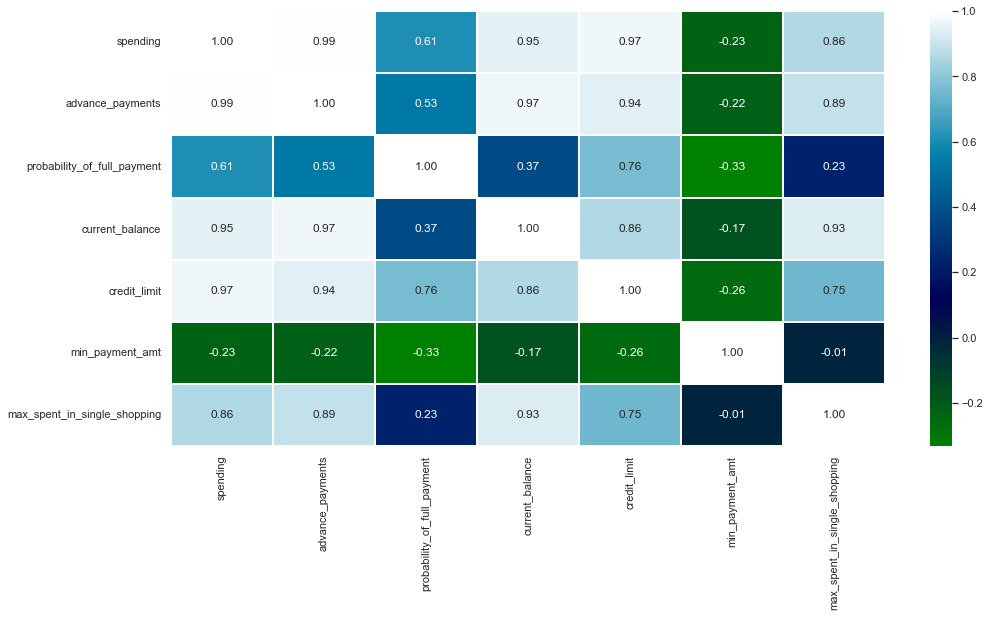

In [261]:
corr = df.corr()
f,ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',cmap='ocean',ax=ax)
plt.show()

# outlier treatment

In [262]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [263]:
lrprobability_of_full_payment,urprobability_of_full_payment=remove_outlier(df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']>urprobability_of_full_payment,urprobability_of_full_payment,df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']<lrprobability_of_full_payment,lrprobability_of_full_payment,df['probability_of_full_payment'])


lrmin_payment_amt,urmin_payment_amt=remove_outlier(df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']>urmin_payment_amt,urmin_payment_amt,df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']<lrmin_payment_amt,lrmin_payment_amt,df['min_payment_amt'])


df.shape

(210, 7)

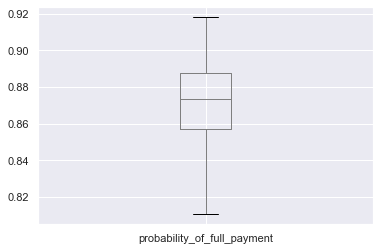

In [264]:
df.boxplot(['probability_of_full_payment'])
plt.show()

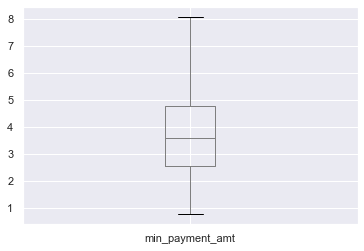

In [265]:
df.boxplot(['min_payment_amt'])
plt.show()

# standardizing the data

In [266]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_DF = X.fit_transform(df)
scaled_DF

array([[ 1.75435461,  1.81196782,  0.177628  , ...,  1.33857863,
        -0.29862524,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.50507052, ...,  0.85823561,
        -0.24229198, -0.53858174],
       [ 1.41330028,  1.42819249,  0.505234  , ...,  1.317348  ,
        -0.22083168,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36483143, ..., -0.15287318,
        -1.32804867, -0.83023461],
       [ 0.43836719,  0.33827054,  1.23277462, ...,  0.60081421,
        -0.95718798,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77966228, ..., -0.07325831,
        -0.70905334,  0.96047321]])

In [304]:
scaled_DF = pd.DataFrame(scaled_DF, index=df.index, columns=df.columns)
scaled_DF.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813
5,-0.739821,-0.882135,0.696692,-1.007977,-0.444794,2.938945,-0.832274
6,-0.974080,-0.943539,-0.881773,-0.630155,-1.190520,0.384751,-0.204099
7,-0.381541,-0.390903,0.143591,-0.331518,-0.383756,-0.513228,-1.189192
8,1.144591,1.305384,-0.311654,1.453520,0.672468,-0.566208,1.764048
9,-1.246235,-1.288937,-0.847736,-1.105261,-1.230328,0.420965,-0.826156


# Clustering

In [268]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [269]:
link_method = linkage(scaled_DF, method = 'ward')

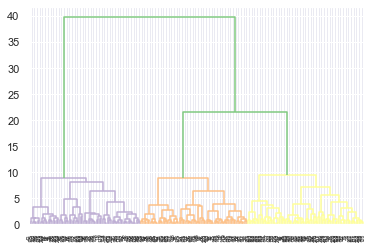

In [270]:
link_method = linkage(scaled_DF, method = 'ward')
dend = dendrogram(link_method, color_threshold=18)

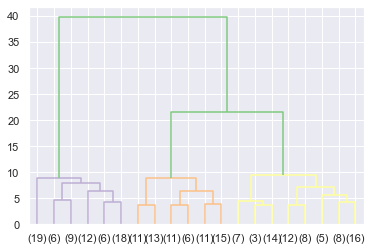

In [271]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',p=20, labels =scaled_DF.index, leaf_font_size=11, color_threshold=18, leaf_rotation=0
                 )

In [272]:
link_method_1 = linkage(scaled_DF, method = 'average')

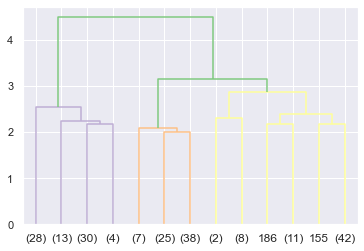

In [273]:
dend = dendrogram(link_method_1,
                 truncate_mode='lastp',p=13
                 )

In [274]:
from scipy.cluster.hierarchy import fcluster

In [275]:
clusters_1 = fcluster(link_method, 3, criterion='maxclust')
clusters_1

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [276]:
cluster_ward=df.copy()

In [277]:
cluster_ward['clusters_1'] = clusters_1

In [278]:
cluster_ward.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_1
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [279]:
cluster_ward['clusters_1'].value_counts().sort_index()

1    70
2    67
3    73
Name: clusters_1, dtype: int64

In [280]:
np.array_equal(clusters_1,clusters_2)

False

In [281]:
from sklearn.cluster import KMeans 

In [282]:
k_means2 = KMeans(n_clusters = 2,random_state=1)
k_means2.fit(scaled_DF)
k_means2.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [283]:
k_means2.inertia_

659.14740095485

In [284]:
wss =[]

In [285]:
for i in range(1,15):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_DF)
    wss.append(KM.inertia_)

C:\Users\Honey Sam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [286]:
wss

[1469.999999999999,
 659.14740095485,
 430.298481751223,
 371.0356644664012,
 325.9741284729876,
 289.45524862464833,
 263.859944426353,
 239.94446635017925,
 220.59353946108112,
 205.7633419678701,
 192.61102798597133,
 181.68734732044285,
 172.81874573725804,
 164.38896099720938]

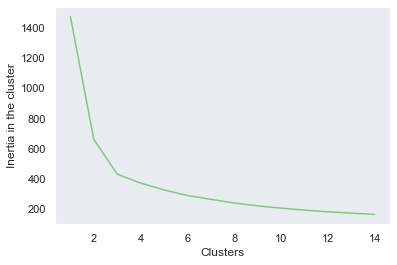

In [287]:
plt.plot(range(1,15), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.grid()
plt.show()

In [288]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_DF)
labels = k_means.labels_
labels

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [289]:
k_means4 = KMeans(n_clusters = 4,random_state=1)
k_means4.fit(scaled_DF)
labels_4 = k_means4.labels_
labels_4

array([3, 1, 3, 0, 3, 0, 0, 1, 3, 0, 3, 2, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0,
       3, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 3, 1, 2, 3,
       0, 0, 1, 3, 3, 3, 0, 3, 3, 3, 3, 2, 0, 0, 0, 3, 1, 0, 0, 2, 1, 3,
       3, 1, 3, 1, 1, 0, 3, 3, 0, 3, 1, 0, 2, 1, 1, 1, 1, 3, 0, 2, 2, 2,
       2, 0, 1, 3, 1, 0, 0, 3, 3, 2, 0, 3, 1, 3, 2, 3, 1, 3, 3, 0, 0, 3,
       2, 1, 3, 0, 0, 2, 1, 2, 0, 3, 1, 0, 0, 0, 1, 1, 3, 0, 1, 1, 0, 1,
       1, 3, 0, 3, 3, 0, 2, 1, 2, 1, 0, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 2,
       0, 1, 1, 0, 1, 3, 3, 0, 3, 2, 3, 0, 2, 1, 1, 0, 1, 0, 1, 3, 3, 3,
       1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 3, 1, 2, 3, 0,
       3, 0, 1, 2, 1, 0, 2, 1, 2, 1, 2, 2])

In [290]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [291]:
silhouette_score(scaled_DF,labels)

0.46560100442748986

In [292]:
silhouette_samples(scaled_DF,labels).min()

-0.005677379727717533